# Baby Example - The Normal Equation


In [1]:
import numpy as np

In [8]:
A = np.array(range(1,5)).reshape(-1,2)
b = np.array([5,6]).reshape(-1,1)
print(A)
print(b)

[[1 2]
 [3 4]]
[[5]
 [6]]


We are supposed to solve $$ Ax=b $$

In [20]:
# if you dont have internet (because you are smart and dont pay 50 € for nothing per month at home)
?np.linalg.solve

Signature:       np.linalg.solve(a, b)
Call signature:  np.linalg.solve(*args, **kwargs)
Type:            _ArrayFunctionDispatcher
String form:     <function solve at 0x0000020FFFDA8220>
File:            c:\users\ge98siw\appdata\local\programs\python\python313\lib\site-packages\numpy\linalg\_linalg.py
Docstring:      
Solve a linear matrix equation, or system of linear scalar equations.

Computes the "exact" solution, `x`, of the well-determined, i.e., full
rank, linear matrix equation `ax = b`.

Parameters
----------
a : (..., M, M) array_like
    Coefficient matrix.
b : {(M,), (..., M, K)}, array_like
    Ordinate or "dependent variable" values.

Returns
-------
x : {(..., M,), (..., M, K)} ndarray
    Solution to the system a x = b.  Returned shape is (..., M) if b is
    shape (M,) and (..., M, K) if b is (..., M, K), where the "..." part is
    broadcasted between a and b.

Raises
------
LinAlgError
    If `a` is singular or not square.

See Also
--------
scipy.linalg.solve : Simi

In [23]:
x = np.linalg.solve(A,b)
print(x)

[[-4. ]
 [ 4.5]]


In [24]:
A@x

array([[5.],
       [6.]])

# Regression Test for the Normal Equation

In [25]:
normalmatrix = A.T @ A
normalconstant = A.T @b 
np.linalg.solve(normalmatrix, normalconstant)

array([[-4. ],
       [ 4.5]])

The approach with the normal equation works even in the quadratic case

# Lateration as given on the Slides
The mobile device actually is at [2,2]
The initial location estimate is [20,20]

In [57]:
A = np.array([
    [0,0,2.92],
    [10,0,8.14],
    [15,10,15.46],
    [0,12,9.89]
] )
def laterationstep(xt):
    #alpha = np.sum((A[:,:2]-xt)**2,axis=1) # just for at home
    alpha = np.sqrt(np.sum((A[:,:2]-xt)**2,axis=1)) # just for at home
    A_slide = -(A[:,:2]-xt) / alpha.reshape(-1,1)
    b = A[:,2]-alpha
    solution,_,_,_ = np.linalg.lstsq(A_slide,b)
    return solution,A_slide,b # the update vector improving x

xt = np.array([20,20]).astype(float)
trace = [xt]
for _ in range(10):
    update,A_slide,b = laterationstep(xt)
    xt += update
    # compute residual
#    r = np.linalg.norm(b - A_slide @ xt)
#    print("Residual: %.3f" % (r))
    print(xt)

# homework: visualize the trace of the lateration.

[ 1.37765171 19.76623028]
[ 1.75489036 10.95048009]
[1.37279433 2.07293539]
[1.94418714 2.15866958]
[1.936139   2.14974486]
[1.9362254 2.1498525]
[1.9362244  2.14985132]
[1.93622441 2.14985134]
[1.93622441 2.14985133]
[1.93622441 2.14985133]


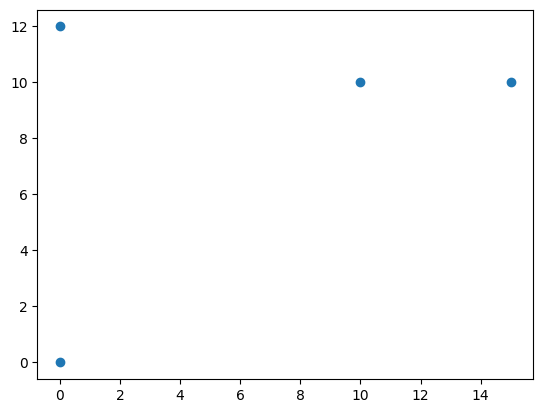

In [28]:
from matplotlib import pyplot as plt
plt.scatter(A[:,0],A[:,1])

In [44]:
?np.linalg.lstsq

Signature:       np.linalg.lstsq(a, b, rcond=None)
Call signature:  np.linalg.lstsq(*args, **kwargs)
Type:            _ArrayFunctionDispatcher
String form:     <function lstsq at 0x0000020FFFDA9580>
File:            c:\users\ge98siw\appdata\local\programs\python\python313\lib\site-packages\numpy\linalg\_linalg.py
Docstring:      
Return the least-squares solution to a linear matrix equation.

Computes the vector `x` that approximately solves the equation
``a @ x = b``. The equation may be under-, well-, or over-determined
(i.e., the number of linearly independent rows of `a` can be less than,
equal to, or greater than its number of linearly independent columns).
If `a` is square and of full rank, then `x` (but for round-off error)
is the "exact" solution of the equation. Else, `x` minimizes the
Euclidean 2-norm :math:`||b - ax||`. If there are multiple minimizing
solutions, the one with the smallest 2-norm :math:`||x||` is returned.

Parameters
----------
a : (M, N) array_like
    "Coe